In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

%matplotlib inline

##### Datasets

In [2]:
df_train = pd.read_csv('train_indessa.csv')
print(df_train.shape)
df_train.head()

(532428, 45)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [3]:
df_test = pd.read_csv('test_indessa.csv')
print(df_test.shape)
df_test.head()

(354951, 44)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,...,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,...,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,...,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0


In [4]:
df_train.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [5]:
df_train.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,...,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,...,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,...,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,...,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


In [6]:
df_train.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
member_id,1.000000,0.065607,0.067888,0.073426,-0.141030,0.034649,0.134179,0.049956,-0.127644,-0.008538,...,-0.075700,-0.113868,-0.072498,0.051447,0.056741,0.017607,0.026725,0.007278,0.046108,-0.489753
loan_amnt,0.065607,1.000000,0.999276,0.997124,0.145037,0.330655,0.041866,-0.000454,-0.033693,-0.038069,...,0.031374,0.073326,0.052995,-0.014822,-0.037226,0.003196,-0.019994,0.327957,0.307989,-0.095713
funded_amnt,0.067888,0.999276,1.000000,0.998041,0.145222,0.330493,0.042699,-0.000171,-0.034298,-0.038058,...,0.031022,0.072895,0.052797,-0.014663,-0.037214,0.003298,-0.019994,0.327955,0.307988,-0.097563
funded_amnt_inv,0.073426,0.997124,0.998041,1.000000,0.145251,0.329495,0.044952,0.000280,-0.038378,-0.035713,...,0.027770,0.071242,0.050261,-0.014240,-0.037181,0.003473,-0.019995,0.327981,0.308022,-0.101877
int_rate,-0.141030,0.145037,0.145222,0.145251,1.000000,-0.072061,0.163206,0.056767,0.228596,-0.032966,...,0.056141,0.107292,0.071187,0.013924,-0.013878,0.026984,0.002744,-0.091506,-0.164408,0.002590
annual_inc,0.034649,0.330655,0.330493,0.329495,-0.072061,1.000000,-0.175867,0.047873,0.033426,-0.051903,...,0.013254,0.007190,0.006332,-0.003960,-0.039256,0.014906,0.000196,0.416120,0.265846,-0.008596
dti,0.134179,0.041866,0.042699,0.044952,0.163206,-0.175867,1.000000,-0.007164,-0.016029,0.006087,...,-0.011336,0.002544,0.003708,0.001032,0.028913,0.007267,-0.016416,-0.014336,0.067941,-0.134020
delinq_2yrs,0.049956,-0.000454,-0.000171,0.000280,0.056767,0.047873,-0.007164,1.000000,0.021701,-0.564741,...,0.017519,-0.000473,0.000011,0.063426,-0.423864,0.133391,0.001720,0.065782,-0.040001,-0.045717
inq_last_6mths,-0.127644,-0.033693,-0.034298,-0.038378,0.228596,0.033426,-0.016029,0.021701,1.000000,0.013275,...,0.033678,0.045276,0.033264,0.007005,0.019156,-0.003681,0.013787,0.033267,0.006220,0.087339
mths_since_last_delinq,-0.008538,-0.038069,-0.038058,-0.035713,-0.032966,-0.051903,0.006087,-0.564741,0.013275,1.000000,...,-0.021201,-0.002314,-0.002755,-0.034682,0.699173,-0.136883,0.032696,-0.094698,-0.024684,0.029236


##### Data Cleaning

In [7]:
df_train.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [8]:
df_train['batch_enrolled'].value_counts()

              106079
BAT2252229     18791
BAT3873588     17839
BAT2803411     17111
BAT2078974     14859
               ...  
BAT4347689        30
BAT4884699        29
BAT5869156        26
BAT5077496        18
BAT2331079        13
Name: batch_enrolled, Length: 104, dtype: int64

In [9]:
df_train = df_train.drop('batch_enrolled', axis = 'columns')

##### Term column

In [10]:
df_train['term']

0         36 months
1         36 months
2         36 months
3         36 months
4         36 months
            ...    
532423    36 months
532424    60 months
532425    60 months
532426    60 months
532427    36 months
Name: term, Length: 532428, dtype: object

In [11]:
def remove_space(x):
    tokens = str(x).split(' ')
    if len(tokens) == 2:
        return tokens[0]

In [12]:
df_train['term'] = df_train['term'].apply(remove_space)

In [13]:
df_train['term']

0         36
1         36
2         36
3         36
4         36
          ..
532423    36
532424    60
532425    60
532426    60
532427    36
Name: term, Length: 532428, dtype: object

##### Annual_inc column

In [14]:
df_train['annual_inc'].head()

0     28700.0
1     65000.0
2     45000.0
3    105000.0
4     52000.0
Name: annual_inc, dtype: float64

In [15]:
df_train['annual_inc'].value_counts()

60000.00    20558
50000.00    18363
65000.00    15420
70000.00    14493
40000.00    14352
            ...  
77871.00        1
77875.00        1
77877.00        1
77882.00        1
95000.16        1
Name: annual_inc, Length: 33988, dtype: int64

In [16]:
df_train['annual_inc'].unique()

array([ 28700.  ,  65000.  ,  45000.  , ..., 852000.  ,  47839.44,
        50077.  ])

In [17]:
df_train['annual_inc'] = df_train['annual_inc'].fillna(60000.00)

##### Delinq_2yrs

In [18]:
df_train['delinq_2yrs'].value_counts()

0.0     430104
1.0      67947
2.0      20167
3.0       7269
4.0       3159
5.0       1622
6.0        898
7.0        451
8.0        266
9.0        166
10.0       116
11.0        73
12.0        61
13.0        37
14.0        28
15.0        14
16.0         9
18.0         8
17.0         6
19.0         4
21.0         2
30.0         1
22.0         1
26.0         1
27.0         1
24.0         1
Name: delinq_2yrs, dtype: int64

In [19]:
df_train['delinq_2yrs'] = df_train['delinq_2yrs'].fillna(0.0)

##### Inq_last_6mnths

In [20]:
df_train['inq_last_6mths']

0         1.0
1         1.0
2         0.0
3         2.0
4         0.0
         ... 
532423    0.0
532424    0.0
532425    1.0
532426    1.0
532427    0.0
Name: inq_last_6mths, Length: 532428, dtype: float64

In [21]:
df_train['inq_last_6mths'].value_counts()

0.0     298854
1.0     144735
2.0      56369
3.0      22548
4.0       6533
5.0       2397
6.0        720
7.0         99
8.0         79
9.0         26
10.0        15
11.0         9
12.0         8
15.0         6
14.0         3
18.0         2
16.0         2
24.0         2
13.0         1
31.0         1
17.0         1
28.0         1
20.0         1
Name: inq_last_6mths, dtype: int64

In [22]:
df_train['inq_last_6mths'] = df_train['inq_last_6mths'].fillna(0.0)

##### mnths_since_last_delinq column

In [23]:
df_train['mths_since_last_delinq']

0         50.0
1          NaN
2          NaN
3         46.0
4          NaN
          ... 
532423     NaN
532424     NaN
532425    26.0
532426     NaN
532427     NaN
Name: mths_since_last_delinq, Length: 532428, dtype: float64

In [24]:
df_train['mths_since_last_delinq'].value_counts()

9.0      5163
6.0      5125
12.0     5037
7.0      5032
13.0     5017
         ... 
146.0       1
176.0       1
151.0       1
119.0       1
123.0       1
Name: mths_since_last_delinq, Length: 147, dtype: int64

In [25]:
df_train = df_train.drop(['mths_since_last_delinq', 'mths_since_last_record'], axis = 'columns')

##### open_acc column

In [26]:
df_train['open_acc']

0         14.0
1          6.0
2          5.0
3         10.0
4         11.0
          ... 
532423    12.0
532424    10.0
532425    14.0
532426     7.0
532427    11.0
Name: open_acc, Length: 532428, dtype: float64

In [27]:
df_train['open_acc'].value_counts()

9.0     48345
10.0    47212
8.0     46065
11.0    43384
7.0     40501
        ...  
70.0        1
56.0        1
82.0        1
75.0        1
68.0        1
Name: open_acc, Length: 73, dtype: int64

In [28]:
df_train['open_acc'] = df_train['open_acc'].fillna(df_train['open_acc'].mean())

##### Pub_rec

In [29]:
df_train['pub_rec']

0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
532423    1.0
532424    1.0
532425    0.0
532426    0.0
532427    0.0
Name: pub_rec, Length: 532428, dtype: float64

In [30]:
df_train['pub_rec'].value_counts()

0.0     451040
1.0      67938
2.0       8841
3.0       2692
4.0        974
5.0        424
6.0        238
7.0         97
8.0         67
9.0         23
10.0        23
11.0        16
12.0        12
13.0         7
21.0         4
16.0         3
15.0         2
20.0         1
40.0         1
14.0         1
86.0         1
49.0         1
63.0         1
22.0         1
17.0         1
28.0         1
18.0         1
23.0         1
Name: pub_rec, dtype: int64

In [31]:
df_train['pub_rec'] = df_train['pub_rec'].fillna(0.0)

##### revol_util

In [32]:
df_train['revol_util']

0         73.1
1         23.2
2         31.2
3         55.5
4         76.2
          ... 
532423    63.6
532424    53.1
532425    49.9
532426    89.7
532427    46.4
Name: revol_util, Length: 532428, dtype: float64

In [33]:
df_train['revol_util'].value_counts()

0.00      2137
53.00     1124
58.00     1082
52.00     1054
62.00     1047
          ... 
5.79         1
128.10       1
127.40       1
141.80       1
17.78        1
Name: revol_util, Length: 1265, dtype: int64

In [34]:
df_train['revol_util'] = df_train['revol_util'].fillna(df_train['revol_util'].mean())

In [35]:
df_train['revol_util'].isnull().sum()

0

##### total_acc column

In [36]:
df_train['total_acc']

0         28.0
1         13.0
2         19.0
3         21.0
4         27.0
          ... 
532423    34.0
532424    29.0
532425    26.0
532426    14.0
532427    20.0
Name: total_acc, Length: 532428, dtype: float64

In [37]:
df_train['total_acc'].value_counts()

20.0     19338
22.0     19266
21.0     19099
19.0     19056
18.0     18738
         ...  
117.0        1
114.0        1
103.0        1
106.0        1
127.0        1
Name: total_acc, Length: 126, dtype: int64

In [38]:
df_train['total_acc'] = df_train['total_acc'].fillna(df_train['total_acc'].mean())

##### collections_12_mths_ex_med column

In [39]:
df_train['collections_12_mths_ex_med']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
532423    0.0
532424    0.0
532425    0.0
532426    0.0
532427    0.0
Name: collections_12_mths_ex_med, Length: 532428, dtype: float64

In [40]:
df_train['collections_12_mths_ex_med'].value_counts()

0.0     525346
1.0       6494
2.0        416
3.0         53
4.0         15
5.0          6
7.0          1
16.0         1
14.0         1
Name: collections_12_mths_ex_med, dtype: int64

In [41]:
df_train['collections_12_mths_ex_med'] = df_train['collections_12_mths_ex_med'].fillna(0.0)

##### mths_since_last_major_derog column

In [42]:
df_train = df_train.drop('mths_since_last_major_derog', axis = 'columns')

##### acc_now_delinq

In [43]:
df_train['acc_now_delinq']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
532423    0.0
532424    0.0
532425    0.0
532426    0.0
532427    0.0
Name: acc_now_delinq, Length: 532428, dtype: float64

In [44]:
df_train['acc_now_delinq'].value_counts()

0.0     529949
1.0       2304
2.0        134
3.0         16
4.0          5
5.0          2
6.0          1
14.0         1
Name: acc_now_delinq, dtype: int64

In [45]:
df_train['acc_now_delinq'] = df_train['acc_now_delinq'].fillna(0.0)

##### tot_coll_amt column

In [46]:
df_train['tot_coll_amt'].head()

0     0.0
1     0.0
2    65.0
3     0.0
4     0.0
Name: tot_coll_amt, dtype: float64

In [47]:
df_train['tot_coll_amt'].value_counts()

0.0        420903
50.0         1053
100.0         815
75.0          631
150.0         418
            ...  
4564.0          1
10764.0         1
13527.0         1
5527.0          1
16332.0         1
Name: tot_coll_amt, Length: 8081, dtype: int64

In [48]:
df_train['tot_coll_amt'] = df_train['tot_coll_amt'].fillna(0.0)

##### total_rev_hi_lim column

In [49]:
df_train['total_rev_hi_lim']

0         30800.0
1         32900.0
2         34900.0
3         24700.0
4         47033.0
           ...   
532423    24800.0
532424    17800.0
532425    24200.0
532426    23300.0
532427    21700.0
Name: total_rev_hi_lim, Length: 532428, dtype: float64

In [50]:
df_train['total_rev_hi_lim'] = df_train['total_rev_hi_lim'].fillna(df_train['total_rev_hi_lim'].mean())

##### verification_status

In [51]:
df_train['verification_status'].head()

0    Source Verified
1    Source Verified
2       Not Verified
3       Not Verified
4           Verified
Name: verification_status, dtype: object

In [52]:
df_train['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [53]:
df_train['verification_status'] = df_train['verification_status'].replace({'Source Verified': 0,
                                                                          'Not Verified': 1,
                                                                          'Verified': 2})

##### Test Dataset

In [54]:
df_test.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  45599
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       20629
emp_length                      17934
home_ownership                      0
annual_inc                          1
verification_status                 0
pymnt_plan                          0
desc                           304770
purpose                             0
title                              62
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        13
inq_last_6mths                     13
mths_since_last_delinq         181758
mths_since_last_record         300021
open_acc                           13
pub_rec     

In [55]:
df_test['term']

0         60 months
1         60 months
2         60 months
3         60 months
4         36 months
            ...    
354946    36 months
354947    60 months
354948    60 months
354949    36 months
354950    60 months
Name: term, Length: 354951, dtype: object

In [56]:
def remove_space(x):
    tokens = str(x).split(' ')
    if len(tokens) == 2:
        return tokens[0]

In [57]:
df_test['term'] = df_test['term'].apply(remove_space)

In [58]:
df_test['annual_inc'].head()

0     73500.0
1    105000.0
2     62300.0
3    150000.0
4     52000.0
Name: annual_inc, dtype: float64

In [59]:
df_test['annual_inc'].value_counts()

60000.0     13723
50000.0     12212
65000.0     10078
70000.0      9628
40000.0      9591
            ...  
204996.0        1
51252.0         1
102508.0        1
139400.0        1
50085.0         1
Name: annual_inc, Length: 25034, dtype: int64

In [60]:
df_test['annual_inc'] = df_test['annual_inc'].fillna(60000.00)

In [61]:
df_test['delinq_2yrs'].value_counts()

0.0     286857
1.0      45277
2.0      13384
3.0       4708
4.0       2168
5.0       1089
6.0        573
7.0        333
8.0        195
9.0        118
10.0        76
11.0        48
12.0        28
13.0        27
14.0        17
15.0        14
16.0         8
19.0         4
17.0         4
18.0         3
20.0         2
22.0         2
39.0         1
26.0         1
29.0         1
Name: delinq_2yrs, dtype: int64

In [62]:
df_test['delinq_2yrs'] = df_test['delinq_2yrs'].fillna(0.0)

In [63]:
df_test['inq_last_6mths']

0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
354946    0.0
354947    2.0
354948    3.0
354949    0.0
354950    0.0
Name: inq_last_6mths, Length: 354951, dtype: float64

In [64]:
df_test['inq_last_6mths'].value_counts()

0.0     199051
1.0      96759
2.0      37748
3.0      14850
4.0       4225
5.0       1588
6.0        511
7.0         96
8.0         43
9.0         24
10.0         9
12.0         7
11.0         6
13.0         5
14.0         3
15.0         3
19.0         2
18.0         2
16.0         1
32.0         1
25.0         1
17.0         1
33.0         1
27.0         1
Name: inq_last_6mths, dtype: int64

In [65]:
df_test['inq_last_6mths'] = df_test['inq_last_6mths'].fillna(0.0)

In [66]:
df_test['mths_since_last_delinq']

0         20.0
1          NaN
2         23.0
3          NaN
4          NaN
          ... 
354946    77.0
354947    19.0
354948    54.0
354949     NaN
354950     NaN
Name: mths_since_last_delinq, Length: 354951, dtype: float64

In [67]:
df_test['mths_since_last_delinq'].value_counts()

9.0      3428
8.0      3347
6.0      3345
12.0     3331
13.0     3301
         ... 
152.0       1
130.0       1
157.0       1
118.0       1
122.0       1
Name: mths_since_last_delinq, Length: 135, dtype: int64

In [68]:
df_test = df_test.drop(['mths_since_last_delinq', 'mths_since_last_record'], axis = 'columns')

In [69]:
df_test['open_acc']

0         16.0
1          8.0
2         11.0
3         21.0
4         16.0
          ... 
354946    12.0
354947    21.0
354948    11.0
354949     7.0
354950     7.0
Name: open_acc, Length: 354951, dtype: float64

In [70]:
df_test['open_acc'].value_counts()

9.0     31940
10.0    31109
8.0     30513
11.0    28881
7.0     27395
        ...  
60.0        1
62.0        1
74.0        1
50.0        1
65.0        1
Name: open_acc, Length: 65, dtype: int64

In [71]:
df_test['open_acc'] = df_test['open_acc'].fillna(df_test['open_acc'].mean())

In [72]:
df_test['pub_rec']

0         0.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
354946    0.0
354947    0.0
354948    1.0
354949    0.0
354950    0.0
Name: pub_rec, Length: 354951, dtype: float64

In [73]:
df_test['pub_rec'].value_counts()

0.0     300532
1.0      45328
2.0       6013
3.0       1795
4.0        590
5.0        333
6.0        147
7.0         73
8.0         46
9.0         27
10.0        19
11.0         7
13.0         5
15.0         4
18.0         4
12.0         4
16.0         2
19.0         2
17.0         2
49.0         1
14.0         1
26.0         1
34.0         1
54.0         1
Name: pub_rec, dtype: int64

In [74]:
df_test['pub_rec'] = df_test['pub_rec'].fillna(0.0)

In [75]:
df_test['revol_util']

0         65.3
1         19.4
2         74.0
3         45.0
4         19.2
          ... 
354946    27.7
354947    61.4
354948    66.1
354949    61.5
354950    25.8
Name: revol_util, Length: 354951, dtype: float64

In [76]:
df_test['revol_util'].value_counts()

0.00      1403
59.00      747
61.00      736
57.00      714
58.00      698
          ... 
113.10       1
36.94        1
139.70       1
122.70       1
118.20       1
Name: revol_util, Length: 1220, dtype: int64

In [77]:
df_test['revol_util'] = df_test['revol_util'].fillna(df_test['revol_util'].mean())

In [78]:
df_test['total_acc']

0         53.0
1         63.0
2         20.0
3         26.0
4         36.0
          ... 
354946    24.0
354947    33.0
354948    25.0
354949    11.0
354950     7.0
Name: total_acc, Length: 354951, dtype: float64

In [79]:
df_test['total_acc'] = df_test['total_acc'].fillna(df_test['total_acc'].mean())

In [80]:
df_test['collections_12_mths_ex_med']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
354946    0.0
354947    0.0
354948    0.0
354949    0.0
354950    0.0
Name: collections_12_mths_ex_med, Length: 354951, dtype: float64

In [81]:
df_test['collections_12_mths_ex_med'] = df_test['collections_12_mths_ex_med'].fillna(0.0)

In [82]:
df_test = df_test.drop('mths_since_last_major_derog', axis = 'columns')

In [83]:
df_test['acc_now_delinq']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
354946    0.0
354947    0.0
354948    0.0
354949    0.0
354950    0.0
Name: acc_now_delinq, Length: 354951, dtype: float64

In [84]:
df_test['acc_now_delinq'].value_counts()

0.0    353287
1.0      1562
2.0        74
3.0        12
4.0         2
5.0         1
Name: acc_now_delinq, dtype: int64

In [85]:
df_test['acc_now_delinq'] = df_test['acc_now_delinq'].fillna(0.0)

In [86]:
df_test['tot_coll_amt'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: tot_coll_amt, dtype: float64

In [87]:
df_test['tot_coll_amt'] = df_test['tot_coll_amt'].fillna(0.0)

In [88]:
df_test['total_rev_hi_lim']

0         45700.0
1         21400.0
2         16300.0
3         72400.0
4         26700.0
           ...   
354946    44000.0
354947    85700.0
354948        NaN
354949    54600.0
354950        NaN
Name: total_rev_hi_lim, Length: 354951, dtype: float64

In [89]:
df_test['total_rev_hi_lim'].value_counts()

15000.0    1093
13000.0    1087
10000.0    1064
12000.0    1049
11500.0    1048
           ... 
48242.0       1
35432.0       1
24126.0       1
48274.0       1
23557.0       1
Name: total_rev_hi_lim, Length: 10841, dtype: int64

In [90]:
df_test['total_rev_hi_lim'] = df_test['total_rev_hi_lim'].fillna(df_test['total_rev_hi_lim'].mean())

In [91]:
df_test['verification_status'].head()

0    Source Verified
1    Source Verified
2       Not Verified
3    Source Verified
4       Not Verified
Name: verification_status, dtype: object

In [92]:
df_test['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [93]:
df_test['verification_status'] = df_test['verification_status'].replace({'Source Verified': 0,
                                                                          'Not Verified': 1,
                                                                          'Verified': 2})

In [94]:
df_test_new = df_test.drop(['grade','batch_enrolled', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'initial_list_status', 'application_type',
       'verification_status_joint', 'last_week_pay'], axis = 'columns')

In [95]:
df_test_new.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,annual_inc,verification_status,dti,delinq_2yrs,...,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60,16.24,73500.0,0,28.65,1.0,...,53.0,3915.61,0.0,0.0,0.0,0.0,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60,9.49,105000.0,0,31.19,0.0,...,63.0,1495.06,0.0,0.0,0.0,0.0,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60,15.61,62300.0,1,21.73,1.0,...,20.0,2096.21,0.0,0.0,0.0,0.0,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60,12.69,150000.0,0,17.27,0.0,...,26.0,1756.31,0.0,0.0,0.0,0.0,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36,6.89,52000.0,1,20.19,0.0,...,36.0,172.21,0.0,0.0,0.0,0.0,0.0,0.0,234278.0,26700.0


In [96]:
df_train.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
member_id,1.000000,0.065607,0.067888,0.073426,-0.141030,0.034651,-0.130303,0.134179,0.049970,-0.127609,...,-0.461192,-0.075700,-0.113868,-0.072498,0.051465,0.017609,0.036940,0.007278,0.042026,-0.489753
loan_amnt,0.065607,1.000000,0.999276,0.997124,0.145037,0.330655,0.073406,0.041866,-0.000441,-0.033666,...,0.532580,0.031374,0.073326,0.052995,-0.014801,0.003198,-0.016197,0.327957,0.295984,-0.095713
funded_amnt,0.067888,0.999276,1.000000,0.998041,0.145222,0.330494,0.072682,0.042699,-0.000157,-0.034270,...,0.531616,0.031022,0.072895,0.052797,-0.014640,0.003300,-0.016041,0.327955,0.296167,-0.097563
funded_amnt_inv,0.073426,0.997124,0.998041,1.000000,0.145251,0.329494,0.071228,0.044952,0.000298,-0.038342,...,0.529116,0.027770,0.071242,0.050261,-0.014206,0.003476,-0.015603,0.327981,0.295656,-0.101877
int_rate,-0.141030,0.145037,0.145222,0.145251,1.000000,-0.072059,0.116299,0.163206,0.056775,0.228609,...,0.445634,0.056141,0.107292,0.071187,0.013931,0.026985,0.004010,-0.091506,-0.158677,0.002590
annual_inc,0.034651,0.330655,0.330494,0.329494,-0.072059,1.000000,-0.007036,-0.175862,0.047875,0.033430,...,0.127483,0.013255,0.007190,0.006332,-0.003960,0.014906,0.001081,0.416120,0.259367,-0.008599
verification_status,-0.130303,0.073406,0.072682,0.071228,0.116299,-0.007036,1.000000,0.059347,-0.014456,0.062752,...,0.157841,0.018076,0.039247,0.024849,-0.013247,0.001608,-0.012386,0.044707,0.026036,0.071371
dti,0.134179,0.041866,0.042699,0.044952,0.163206,-0.175862,0.059347,1.000000,-0.007149,-0.016001,...,0.018475,-0.011336,0.002544,0.003708,0.001052,0.007269,-0.011767,-0.014336,0.065408,-0.134020
delinq_2yrs,0.049970,-0.000441,-0.000157,0.000298,0.056775,0.047875,-0.014456,-0.007149,1.000000,0.021709,...,0.002817,0.017482,-0.000482,-0.000010,0.063425,0.133392,0.003379,0.065782,-0.039354,-0.045730
inq_last_6mths,-0.127609,-0.033666,-0.034270,-0.038342,0.228609,0.033430,0.062752,-0.016001,0.021709,1.000000,...,0.087700,0.033606,0.045254,0.033200,0.006981,-0.003680,0.010235,0.033267,0.005743,0.087306


In [97]:
df_test.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,...,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
member_id,1.000000,0.062741,0.065052,0.070630,-0.143967,0.033381,-0.128296,0.048879,0.049844,-0.126635,...,0.033265,-0.460959,-0.077424,-0.115382,-0.073299,0.051466,0.015958,0.003576,0.009082,0.047945
loan_amnt,0.062741,1.000000,0.999242,0.997103,0.145004,0.335861,0.075508,0.014420,0.000300,-0.034844,...,0.225535,0.535916,0.031427,0.072886,0.051021,-0.019314,0.005135,-0.002647,0.330025,0.306967
funded_amnt,0.065052,0.999242,1.000000,0.998002,0.145069,0.335523,0.074669,0.014687,0.000648,-0.035294,...,0.225535,0.534734,0.031157,0.072377,0.050694,-0.019157,0.005243,-0.002626,0.330025,0.307185
funded_amnt_inv,0.070630,0.997103,0.998002,1.000000,0.145138,0.334405,0.073214,0.015459,0.001218,-0.039587,...,0.225829,0.532276,0.028249,0.070015,0.048089,-0.018712,0.005468,-0.002562,0.330044,0.306651
int_rate,-0.143967,0.145004,0.145069,0.145138,1.000000,-0.073901,0.119396,0.055019,0.052824,0.226257,...,-0.040346,0.445744,0.058665,0.106162,0.070386,0.012483,0.025706,0.001450,-0.091259,-0.162976
annual_inc,0.033381,0.335861,0.335523,0.334405,-0.073901,1.000000,-0.008265,-0.061567,0.046863,0.037889,...,0.192556,0.130160,0.013879,0.008523,0.007087,-0.003901,0.014568,0.001794,0.421940,0.262256
verification_status,-0.128296,0.075508,0.074669,0.073214,0.119396,-0.008265,1.000000,0.020185,-0.018959,0.064122,...,0.043332,0.157570,0.017832,0.041902,0.025378,-0.012562,-0.001634,0.000631,0.042944,0.026319
dti,0.048879,0.014420,0.014687,0.015459,0.055019,-0.061567,0.020185,1.000000,-0.001259,-0.005835,...,0.073564,0.005093,-0.004162,0.000714,0.001836,-0.000992,0.001835,-0.001106,-0.005462,0.023167
delinq_2yrs,0.049844,0.000300,0.000648,0.001218,0.052824,0.046863,-0.018959,-0.001259,1.000000,0.020901,...,0.121421,-0.000029,0.017291,-0.001109,0.002447,0.062399,0.125650,0.000254,0.063239,-0.042043
inq_last_6mths,-0.126635,-0.034844,-0.035294,-0.039587,0.226257,0.037889,0.064122,-0.005835,0.020901,1.000000,...,0.134372,0.082464,0.028561,0.046060,0.035117,0.006596,-0.007918,0.002002,0.035952,0.004974


In [98]:
y = np.array(df_train['loan_status'])
y = y.reshape(-1,1)

In [99]:
X = df_train.iloc[:, df_train.columns != 'loan_status']

In [100]:
X.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'application_type',
       'verification_status_joint', 'last_week_pay', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [101]:
X.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,58189336,14350,14350,14350.0,36,19.19,E,E3,clerk,9 years,...,0.0,0.0,0.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0
1,70011223,4800,4800,4800.0,36,10.99,B,B4,Human Resources Specialist,< 1 year,...,0.0,0.0,0.0,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0
2,70255675,10000,10000,10000.0,36,7.26,A,A4,Driver,2 years,...,0.0,0.0,0.0,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0
3,1893936,15000,15000,15000.0,36,19.72,D,D5,Us office of Personnel Management,10+ years,...,0.0,0.0,0.0,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0
4,7652106,16000,16000,16000.0,36,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,...,0.0,0.0,0.0,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0


In [102]:
X.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'application_type',
       'verification_status_joint', 'last_week_pay', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

##### Final X dataset

In [103]:
X_new = X.drop(['grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'initial_list_status', 'application_type',
       'verification_status_joint', 'last_week_pay'], axis = 'columns')

In [104]:
X_new.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,annual_inc,verification_status,dti,delinq_2yrs,...,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,58189336,14350,14350,14350.0,36,19.19,28700.0,0,33.88,0.0,...,28.0,1173.84,0.0,0.0,0.0,0.0,0.0,0.0,28699.0,30800.0
1,70011223,4800,4800,4800.0,36,10.99,65000.0,0,3.64,0.0,...,13.0,83.95,0.0,0.0,0.0,0.0,0.0,0.0,9974.0,32900.0
2,70255675,10000,10000,10000.0,36,7.26,45000.0,1,18.42,0.0,...,19.0,56.47,0.0,0.0,0.0,0.0,0.0,65.0,38295.0,34900.0
3,1893936,15000,15000,15000.0,36,19.72,105000.0,1,14.97,0.0,...,21.0,4858.62,0.0,0.0,0.0,0.0,0.0,0.0,55564.0,24700.0
4,7652106,16000,16000,16000.0,36,10.64,52000.0,2,20.16,0.0,...,27.0,2296.41,0.0,0.0,0.0,0.0,0.0,0.0,47159.0,47033.0


##### Label encoding of both X_New dataset and df_test Dataset

In [105]:
encoder = LabelEncoder()

In [106]:
X_New = X_new.apply(LabelEncoder().fit_transform)

In [107]:
df_test_new = df_test_new.apply(LabelEncoder().fit_transform)

##### The X_New dataset

In [67]:
X_New.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,annual_inc,verification_status,dti,delinq_2yrs,...,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,398326,544,544,3947,0,405,3536,0,3388,0,...,28,88708,0,0,0,0,0,0,27239,4975
1,499336,162,162,1267,0,110,18725,0,364,0,...,12,5483,0,0,0,0,0,0,8678,5378
2,501773,370,370,2986,0,23,10180,1,1842,0,...,18,3340,0,0,0,0,0,59,36682,5722
3,51253,570,570,4223,0,419,28894,1,1497,0,...,20,210086,0,0,0,0,0,0,52829,3795
4,98100,610,610,4425,0,100,13426,2,2016,0,...,27,149650,0,0,0,0,0,0,45181,7590


##### Data visualization

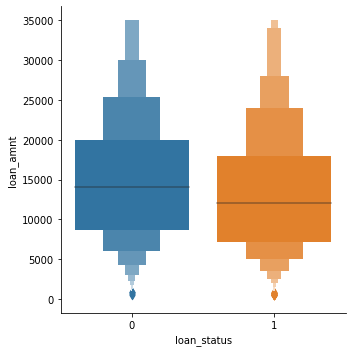

In [108]:
sns.catplot(x="loan_status", y="loan_amnt", data=df_train, kind="boxen");

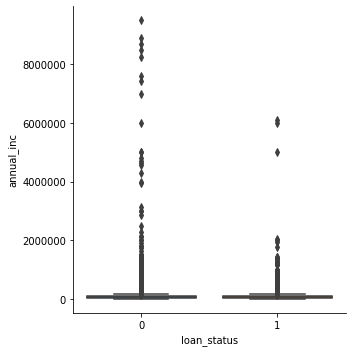

In [109]:
sns.catplot(x="loan_status", y="annual_inc", data=df_train, kind="box");

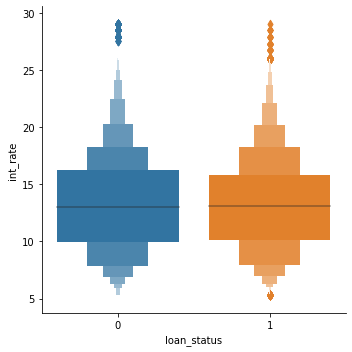

In [110]:
sns.catplot(x="loan_status", y="int_rate", data=df_train, kind="boxen");

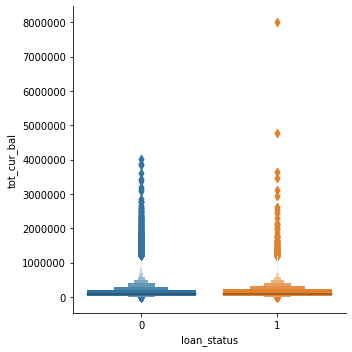

In [111]:
sns.catplot(x="loan_status", y="tot_cur_bal", data=df_train, kind="boxen");

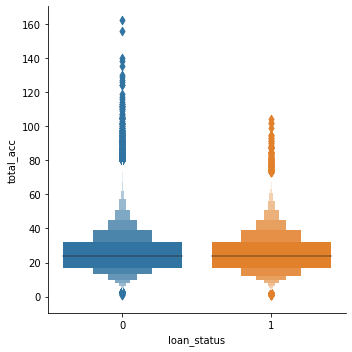

In [112]:
sns.catplot(x="loan_status", y="total_acc", data=df_train, kind="boxen");

##### Splitting of the X_New Dataset in 0.5 ratio

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_New, y, test_size = 0.5)

In [114]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((266214, 25), (266214, 1), (266214, 25), (266214, 1))

##### Scaling using Standard Scaler

In [115]:
Scaler = StandardScaler()

In [116]:
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

##### Random Forest Classifier

In [117]:
rfc = RandomForestClassifier()

In [118]:
rfc.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [119]:
rfc_score = rfc.score(X_test, y_test)*100
rfc_score

89.48665359447662

##### Presiction on X_test

In [120]:
y_pred = rfc.predict(X_test)

##### Graph between y_test and y_predicted

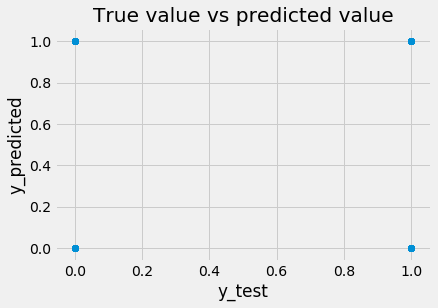

In [122]:
plt.scatter(y_test, y_pred)
plt.ylabel('y_predicted')
plt.xlabel('y_test')

plt.title('True value vs predicted value')

plt.grid(True)

plt.style.use('fivethirtyeight')

##### ROC_AUC score

In [123]:
from sklearn import metrics

roc_auc = metrics.roc_auc_score(y_test, y_pred)
print('Roc_auc score = ', round((roc_auc) * 100))

Roc_auc score =  81.0


##### Classification report

In [124]:
classification_report = metrics.classification_report(y_test, y_pred)
print(classification_report)


              precision    recall  f1-score   support

           0       0.90      0.97      0.93    203131
           1       0.89      0.64      0.74     63083

    accuracy                           0.89    266214
   macro avg       0.89      0.81      0.84    266214
weighted avg       0.89      0.89      0.89    266214



##### Confusion matrix

In [125]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[197921   5210]
 [ 22778  40305]]


##### Prediction on Test dataset

In [126]:
df_test_new['loan_status'] = rfc.predict(df_test_new)